In [116]:
import pandas as pd
import numpy as np

In [117]:
df = pd.read_csv("DataCoSupplyChainDataset_no_zeros.csv")


In [118]:
df.head()

,Late_delivery_risk,Delivery Status,Days for shipping (real),Days for shipment (scheduled),order date (DateOrders),shipping date (DateOrders),Order Id,Order Status,Order Region,Order State,...,Product Category Id,Product Price,Order Item Quantity,Order Item Product Price,Order Item Discount,Order Item Total,Shipping Mode,Sales,Order Profit Per Order,Sales per customer
0,1,Advance shipping,3.0,4.0,1/31/2018 22:56,2/3/2018 22:56,77202,COMPLETE,Southeast Asia,Java Occidental,...,73,327.75,1,327.75,13.110000,314.640015,Standard Class,327.75,91.250000,314.640015
1,1,Late delivery,5.0,4.0,1/13/2018 12:27,1/18/2018 12:27,75939,PENDING,South Asia,Rajastán,...,73,327.75,1,327.75,16.389999,311.359985,Standard Class,327.75,-249.089996,311.359985
2,1,Shipping on time,4.0,4.0,1/13/2018 12:06,1/17/2018 12:06,75938,CLOSED,South Asia,Rajastán,...,73,327.75,1,327.75,18.030001,309.720001,Standard Class,327.75,-247.779999,309.720001
3,1,Advance shipping,3.0,4.0,1/13/2018 11:45,1/16/2018 11:45,75937,COMPLETE,Oceania,Queensland,...,73,327.75,1,327.75,22.940001,304.809998,Standard Class,327.75,22.860001,304.809998
4,1,Advance shipping,2.0,4.0,1/13/2018 11:24,1/15/2018 11:24,75936,PENDING_PAYMENT,Oceania,Queensland,...,73,327.75,1,327.75,29.500000,298.250000,Standard Class,327.75,134.210007,298.250000


In [119]:
df.shape

(800, 24)

In [120]:
df.tail()

,Late_delivery_risk,Delivery Status,Days for shipping (real),Days for shipment (scheduled),order date (DateOrders),shipping date (DateOrders),Order Id,Order Status,Order Region,Order State,...,Product Category Id,Product Price,Order Item Quantity,Order Item Product Price,Order Item Discount,Order Item Total,Shipping Mode,Sales,Order Profit Per Order,Sales per customer
795,1,Late delivery,6.0,4.0,7/10/2017 7:38,7/16/2017 7:38,63115,PENDING,Western Europe,Renania del Norte-Westfalia,...,17,59.990002,4,59.990002,24.835652,239.960007,Standard Class,239.960007,79.190002,239.960007
796,1,Advance shipping,2.0,4.0,7/16/2017 4:08,7/18/2017 4:08,63516,PENDING,Western Europe,Países del Loira,...,17,59.990002,4,59.990002,4.800000,235.160004,Standard Class,239.960007,117.580002,235.160004
797,1,Advance shipping,2.0,4.0,6/25/2017 7:08,6/27/2017 7:08,62086,PENDING,Northern Europe,Inglaterra,...,17,59.990002,4,59.990002,7.200000,232.759995,Standard Class,239.960007,20.480000,232.759995
798,1,Advance shipping,3.0,4.0,7/5/2017 23:14,7/8/2017 23:14,62817,PENDING,Southern Europe,Madrid,...,17,59.990002,4,59.990002,7.200000,232.759995,Standard Class,239.960007,58.189999,232.759995
799,1,Advance shipping,2.0,4.0,6/8/2015 10:59,6/10/2015 10:59,10856,PENDING,Northern Europe,Inglaterra,...,17,59.990002,4,59.990002,9.600000,230.360001,Standard Class,239.960007,82.930000,230.360001


In [121]:
df.shape

(800, 24)

In [122]:
df["delay_days"] = df["Days for shipping (real)"] - df["Days for shipment (scheduled)"]
df["delayed_flag"] = (df["delay_days"] > 0).astype(int)
print(df["delayed_flag"].value_counts())

delayed_flag
1    454
0    346
Name: count, dtype: int64


In [123]:
drop_cols = ["Order Id", "Late_delivery_risk", "Delivery Status"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")

In [124]:
X = df.drop(columns=["delayed_flag", "delay_days"])
y = df["delayed_flag"]


In [125]:
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns


In [175]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [179]:
X_train.shape

(640, 21)

In [180]:
X_test.shape

(160, 21)

In [181]:
y_train.shape

(640,)

In [182]:
y_test.shape

(160,)

In [171]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Order Zipcode', 'Product Category Id', 'Product Price',
       'Order Item Quantity', 'Order Item Product Price',
       'Order Item Discount', 'Order Item Tota...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['order date (DateOrders)', 'shipping date (DateOrders)', 'Order Status',
       'Order Region', 'Order State', 'Order City', 'Category Name',
       'Department Name', 'Shipping Mode'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [172]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("\n✅ Model Evaluation Results:")
print("Accuracy:", round(acc, 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



✅ Model Evaluation Results:
Accuracy: 0.912
F1-score: 0.926

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.89        69
           1       0.90      0.96      0.93        91

    accuracy                           0.91       160
   macro avg       0.92      0.91      0.91       160
weighted avg       0.91      0.91      0.91       160


Confusion Matrix:
 [[59 10]
 [ 4 87]]


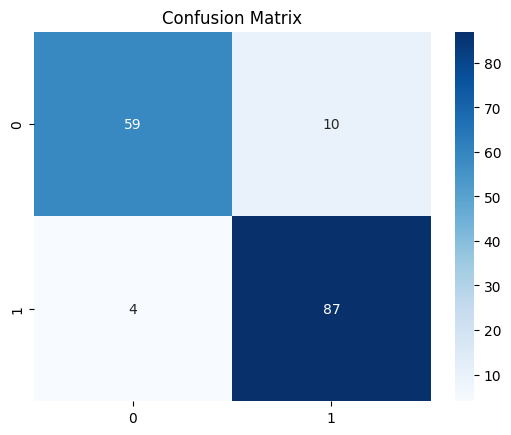

In [183]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [184]:
joblib.dump(model, "supply_chain_delay_model.pkl")
print("\n🎯 Model saved as 'supply_chain_delay_model.pkl'")



🎯 Model saved as 'supply_chain_delay_model.pkl'
